# Enhanced rule symbolic and analytical implementation

This notebook presents the enhanced rule for the fatigue model for plain concrete under uniaxial compressive loading, sugessted by A. Baktheer et al. in [Enhanced assessment rule for concrete fatigue under compression considering the nonlinear effect of loading sequence](https://www.researchgate.net/publication/332636421_Enhanced_assessment_rule_for_concrete_fatigue_under_compression_considering_the_nonlinear_effect_of_loading_sequence)

In this paper, a refined engineering rule for the assessment of remaining fatigue life of concrete under compressive cyclic loading with varying amplitudes is proposed. The rule has been derived based on a combined numerical and experimental investigation of the loading sequence effect. The applied modeling approach is based on a damage model using the equivalent tensile strain rate to govern the fatigue damage evolution upon loading and reloading at subcritical load levels. A systematic calibration and validation procedure of the numerical model was performed based on the available experimental results. The prediction of the numerical model was compared with existing damage accumulation rules for the assessment of the concrete fatigue life exposed to varying loading ranges. Based on these studies, an enhancement of the Palmgren-Miner rule is proposed and validated for several loading sequence scenarios.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import Piecewise

### 5. Enhanced rule for the loading sequence effect

#### 5.1. Correction term for the P-M rule

##### eq 27:
The expression for the consumed fatigue life under a loading scenario consisting of n varying loading ranges is proposed in
the form

$$\eta  =  \sum_{i=1}^{n} \eta_i + \sum_{i=1}^{n-1} \Delta\eta_i$$

In [2]:
def get_eta(self, eta_i, delta_eta_i):
    eta = sum(eta_i) + (delta_eta_i)
    return eta

$$\eta_i  = N_i / N^f_i$$

In [3]:
def get_eta_i(self, n_i, n_i_f):
    eta_i = n_i / n_i_f
    return eta_i

##### eq 28:
The correction term ∆ηi is introduced as a response function of the parameters describing the load jump

$$ \Delta\eta_i \overset{\mathrm{def}}{=} \mathscr{R} (\bar{S}_i, \Delta S_i^{max}, \Delta S_i^{min}, \tilde{\eta_i})$$

$$\bar{S}_i = (S_i^m + S_{i+1}^m)  /  2$$

In [4]:
def get_s_bar_i(self, s_m_i, s_m_ip1):
    s_bar_i = (s_m_i + s_m_ip1) / 2
    return s_bar_i

$$S_i^m = (S_i^{max} + S_i^{min})  /  2$$

In [5]:
def get_s_m_i(self, s_max_i, s_min_i):
    s_m_i = (s_max_i + s_min_i) / 2
    return s_m_i

$$S_{i+1}^m = (S_{i+1}^{max} + S_{i+1}^{min})  /  2$$

In [6]:
def get_s_m_ip1(self, s_max_ip1, s_min_ip1):
    s_m_ip1 = (s_max_ip1 + s_min_ip1) / 2
    return s_m_ip1

$$\Delta S_i^{max} = S_{i+1}^{max} - S_i^{min}$$ 

In [7]:
def get_delta_s_max_i(self, s_max_ip1, s_min_i):
    delta_s_max_i = (s_max_ip1 - s_min_i)
    return delta_s_max_i

$$\Delta S_i^{min} = S_{i+1}^{min} - S_i^{min}$$ 

In [8]:
def get_delta_s_min_i(self, s_min_ip1, s_min_i):
    delta_s_min_i = (s_min_ip1 - s_min_i)
    return delta_s_min_i

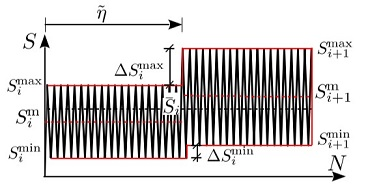

##### eq 29:
The view on the response surface along the $\tilde{\eta}$ axis shown in figure below for several values of S max
reveals that it can be suffi-
ciently well represented using a bilinear approximation. This feature of the response surface has been exploited to construct the response surface around the line connecting the knee points
with the coordinates ($eta_x$, $\Delta\eta_{max}$) as follows

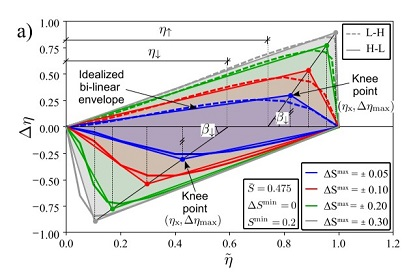

In [9]:
delta_eta_i,delta_eta_max, tilde_eta_i,eta_x = sp.symbols(
    r'\Delta\eta_i,\Delta\eta_{max},\tilde{\eta_i}, eta_x', 
    real=True, nonnegative=True
)

In [10]:
delta_eta_i = sp.Piecewise(   
    
    ((delta_eta_max * (1 - ((eta_x-tilde_eta_i) / eta_x))),  ((tilde_eta_i > 0) & (tilde_eta_i <= eta_x))) ,
        ((delta_eta_max * ((tilde_eta_i - 1) / (eta_x - 1)) ,  ((tilde_eta_i > eta_x) & (tilde_eta_i < 1))))
)

delta_eta_i

Piecewise((\Delta\eta_{max}*(1 - (-\tilde{\eta_i} + eta_x)/eta_x), (\tilde{\eta_i} <= eta_x) & (\tilde{\eta_i} > 0)), (\Delta\eta_{max}*(\tilde{\eta_i} - 1)/(eta_x - 1), (\tilde{\eta_i} > eta_x) & (\tilde{\eta_i} < 1)))

To cover the whole domain of possible load scenarios with constant minimum load, the response function has been developed around the slice $\bar{S}_i = 0.475$ as indicated in the figures below

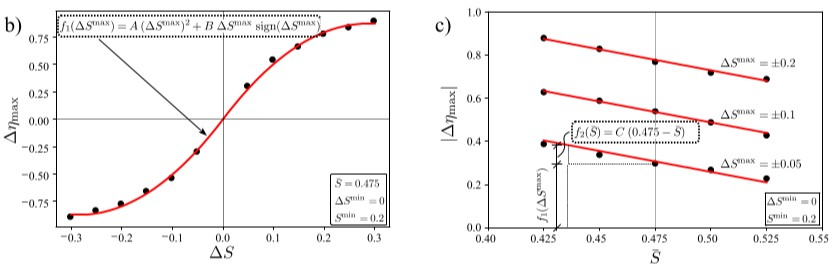

Based on the numerical results shown as black circles, we propose to approximate ∆ηmax as a function of the jump parameters
with step index omitted for brevity as

##### eq 30:

$$ \Delta\eta_{max} (\bar{S}, \Delta S^{max}) = [\mathit{f}_1(\Delta S^{max} + \mathit{f}_2 (\bar{S})] sign (\Delta S^{max})$$


In [21]:
def get_delta_eta_max_i(self, f_1, f_2, s_bar_i, delta_s_max_i):
    delta_eta_max_i = (f_1 * (delta_s_max_i + f_2)) * np.sign(delta_s_max_i)
    return delta_eta_max_i

##### eq 31:

$$ \mathit{f}_1 (\Delta S^{max}) = \mathrm{A} (\Delta S^{max})^2 + \mathrm{B} \Delta S^{max} sign (\Delta S^{max})$$

In [22]:
def get_f_1(self, A, B, delta_s_max_i):
    f_1 = A * (delta_s_max_i)**2 + B * delta_s_max_i * np.sign(delta_s_max_i)
    return f_1

##### eq 32:

$$ \mathit{f}_2 (\bar{S}) = \mathrm{C} (\ 0.475 - \bar{S})$$

In [ ]:
def get_f_2(self, C, s_bar_i):
    f_2 = C * (0.475 - s_bar_i)
    return f_2

In [11]:
A = -10.66
B = 6.1
C = 2

From figure below we can further conclude that the horizontal value $\eta_{x}$ can be assumed linearly dependent on $\Delta\eta_{max}$ with different linearity coefficients for positive and negative signs of the
load jump, i.e.

##### eq 33:


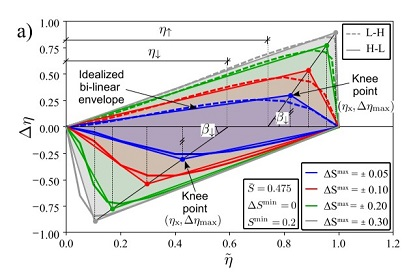

In [12]:
eta_uparrow, eta_downarrow, beta_uparrow, beta_downarrow, Delta_eta_max, tan = sp.symbols(
    r'\eta_\uparrow, \eta_\downarrow, \beta_\uparrow, \beta_\downarrow,\Delta\eta_{max},\tan', 
    real=True, nonnegative=True
)

In [13]:
eta_x = sp.Piecewise(   
    
    ((eta_uparrow + delta_eta_max / tan * (beta_uparrow)) , (delta_eta_max > 0)),
    ((eta_downarrow + delta_eta_max / tan * (beta_downarrow)) , (delta_eta_max <= 0)),
)

eta_x

Piecewise((\Delta\eta_{max}*\beta_\uparrow/\tan + \eta_\uparrow, \Delta\eta_{max} > 0), (\Delta\eta_{max}*\beta_\downarrow/\tan + \eta_\downarrow, True))

In [14]:
eta_uparrow = 0.74
beta_uparrow = 74.7
eta_downarrow = 0.59
beta_downarrow = 60.5